<a href="https://colab.research.google.com/github/kumaramitvats1/Hello--JSWorld/blob/master/Project_WeedfromSeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split


In [44]:
batch_size = 32
num_classes = 12
epochs = 100
num_predictions = 20

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's load the images as a numpy array


In [8]:
dataset = np.load('/content/drive/My Drive/Colab-ANN/images.npy',encoding='bytes')

In [9]:
dataset.shape

(4750, 128, 128, 3)

There are 4750 images of size 128 pixel by 128 pixel of the 3 channels R,G,B


In [10]:
dataset[9, :, :, :].shape

(128, 128, 3)

Let's load the labels for the images



In [11]:
dflabel = pd.read_csv('/content/drive/My Drive/Colab-ANN/Labels.csv')

In [12]:
dflabel.shape

(4750, 1)

In [13]:
dflabel.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

There are 12 categories of images.

Let's convert the dataframe to numpy array.

In [14]:
nplabel=dflabel.to_numpy()
nplabel

array([['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ['Small-flowered Cranesbill'],
       ...,
       ['Loose Silky-bent'],
       ['Loose Silky-bent'],
       ['Loose Silky-bent']], dtype=object)

Label: ['Small-flowered Cranesbill']


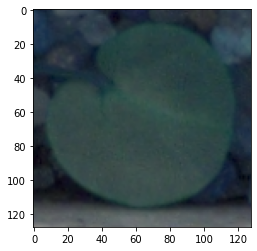

In [15]:
plt.imshow(dataset[300], cmap='gray')
print("Label: {}".format(nplabel[200]))

Label: ['Fat Hen']


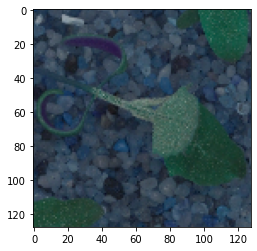

In [16]:
plt.imshow(dataset[700], cmap='gray')
print("Label: {}".format(nplabel[700]))

**Data Preprocessing**

In [17]:
#Gaussian1 = cv2.GaussianBlur(dataset[700],(5,5),0)
#cv2_imshow(Gaussian1)
i=0
while i < 4750:
  cv2.GaussianBlur(dataset[i],(5,5),0)
  i= i+1
  print(i)
  #cv2_imshow(dataset[i])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


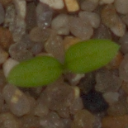

In [18]:
cv2_imshow(dataset[2000])

**Normalization**

In [19]:
dataset.shape

(4750, 128, 128, 3)

In [20]:
datasetNorm = dataset.astype('float32') / 255.0

In [21]:
datasetNorm.shape

(4750, 128, 128, 3)

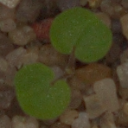

In [22]:
cv2_imshow(dataset[200])

In [23]:
datasetNorm[200]

array([[[0.39215687, 0.4627451 , 0.46666667],
        [0.3882353 , 0.45882353, 0.4745098 ],
        [0.36078432, 0.43137255, 0.45490196],
        ...,
        [0.17254902, 0.22745098, 0.2627451 ],
        [0.16862746, 0.23137255, 0.26666668],
        [0.17254902, 0.23137255, 0.27058825]],

       [[0.3372549 , 0.3882353 , 0.42352942],
        [0.36078432, 0.41568628, 0.4509804 ],
        [0.36078432, 0.41960785, 0.45490196],
        ...,
        [0.17254902, 0.23137255, 0.27058825],
        [0.16862746, 0.22745098, 0.27058825],
        [0.16470589, 0.22745098, 0.26666668]],

       [[0.24705882, 0.29411766, 0.36078432],
        [0.3019608 , 0.34509805, 0.40784314],
        [0.34117648, 0.39215687, 0.4392157 ],
        ...,
        [0.17254902, 0.23137255, 0.28235295],
        [0.16862746, 0.23137255, 0.2784314 ],
        [0.16470589, 0.22745098, 0.27450982]],

       ...,

       [[0.2509804 , 0.30588236, 0.35686275],
        [0.23529412, 0.29803923, 0.34509805],
        [0.23921569, 0

**Prepare Data, create Training, Validation and Test datasets**

In [24]:
from sklearn.preprocessing import LabelBinarizer
labelencoded = LabelBinarizer()
nplabel= labelencoded.fit_transform(nplabel)
nplabel.shape

(4750, 12)

In [25]:
i=10
nplabel[i]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [26]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(datasetNorm, nplabel, test_size=0.3, random_state=1)

In [27]:
X_test.shape

(1425, 128, 128, 3)

In [28]:
y_test.shape

(1425, 12)

In [29]:
V_Val,X_testNew, y_Val,y_testNew = train_test_split(X_test,y_test,test_size=0.5,random_state=1)

In [30]:
V_Val.shape

(712, 128, 128, 3)

In [31]:
y_Val.shape

(712, 12)

Label: [0 0 0 0 0 0 0 0 0 0 1 0]


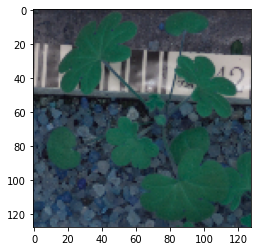

In [32]:
plt.imshow(X_testNew[100], cmap='gray')
print("Label: {}".format(y_testNew[100]))

Label: [0 0 0 0 0 0 0 0 0 0 1 0]


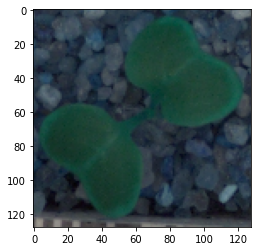

In [33]:
plt.imshow(X_train[100], cmap='gray')
print("Label: {}".format(y_train[200]))

Label: [0 0 0 1 0 0 0 0 0 0 0 0]


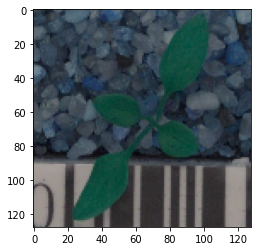

In [34]:
plt.imshow(V_Val[101], cmap='gray')
print("Label: {}".format(y_Val[101]))

**Verify the shapes of datasets whether compatible to Keras operation**

In [35]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Images in X_train:", X_train.shape[0])
print("X_train shape:", X_testNew.shape)
print("Images in X_test:", X_testNew.shape[0])
print("X_train shape:", V_Val.shape)
print("Images in X_test:", V_Val.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (3325, 128, 128, 3)
y_train shape: (3325, 12)
Images in X_train: 3325
X_train shape: (713, 128, 128, 3)
Images in X_test: 713
X_train shape: (712, 128, 128, 3)
Images in X_test: 712
Max value in X_train: 1.0
Min value in X_train: 0.0


In [36]:
y_train.shape

(3325, 12)

In [37]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [38]:
y_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
n_e= number of examples, n_h = height, n_w = width, n_c = number of channels

Our datasets are in the required shape


**Building CNN**

In [39]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [40]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [41]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [42]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

**Train the Model**

Epoch 1/100
104/104 [==============================] - 3s 29ms/step - loss: 0.3728 - accuracy: 0.8620 - val_loss: 0.7540 - val_accuracy: 0.7486

Epoch 00001: val_loss did not improve from 0.41397
Epoch 2/100
104/104 [==============================] - 3s 28ms/step - loss: 0.3557 - accuracy: 0.8752 - val_loss: 0.7277 - val_accuracy: 0.7556

Epoch 00002: val_loss did not improve from 0.41397
Epoch 3/100
104/104 [==============================] - 3s 28ms/step - loss: 0.3674 - accuracy: 0.8719 - val_loss: 0.5110 - val_accuracy: 0.8343

Epoch 00003: val_loss did not improve from 0.41397
Epoch 4/100
104/104 [==============================] - 3s 28ms/step - loss: 0.3940 - accuracy: 0.8629 - val_loss: 1.0780 - val_accuracy: 0.6180

Epoch 00004: val_loss did not improve from 0.41397
Epoch 5/100
104/104 [==============================] - 3s 28ms/step - loss: 0.3625 - accuracy: 0.8692 - val_loss: 0.7376 - val_accuracy: 0.7528

Epoch 00005: val_loss did not improve from 0.41397
Epoch 6/100
104/104 

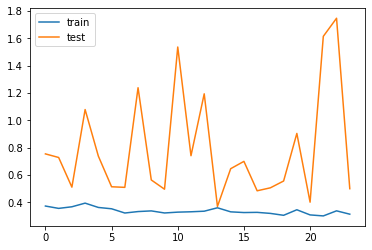

In [45]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(V_Val, y_Val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])


# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
# Score trained model.
scores = model.evaluate(V_Val, y_Val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 11ms/step - loss: 0.4996 - accuracy: 0.8371
Test loss: 0.499557763338089
Test accuracy: 0.8370786309242249


Predicted label: 6
Softmax Outputs: [[1.3932897e-01 2.3788294e-11 1.9497584e-09 3.4821310e-09 4.0858486e-06
  4.0457849e-07 8.6066133e-01 1.0463282e-11 5.1001075e-06 2.1251417e-11
  4.3891273e-08 2.1699445e-10]]
0.99999994


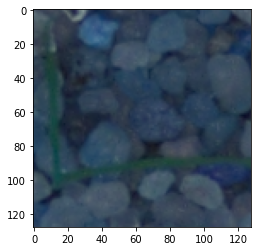

In [48]:
plt.imshow(X_testNew[2], cmap='gray')
y_pred = model.predict(X_testNew[2].reshape(1,128,128,3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 5
Softmax Outputs: [[5.3721978e-05 8.5503451e-08 1.9347957e-05 2.0921334e-08 1.5358196e-04
  9.9976593e-01 6.1670545e-07 9.1599497e-07 2.8759689e-07 4.5085521e-08
  2.2188365e-06 3.1319216e-06]]
1.0


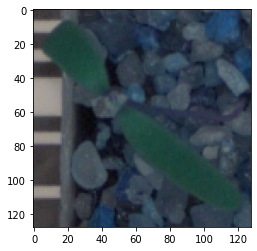

In [47]:
plt.imshow(X_testNew[3], cmap='gray')
y_pred = model.predict(X_testNew[3].reshape(1,128,128,3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 10
Softmax Outputs: [[2.56593066e-05 6.91564614e-03 1.82995901e-01 1.54216978e-04
  4.55668414e-05 3.49259228e-02 1.07701147e-04 2.33788020e-03
  1.15427734e-04 6.55241776e-04 7.71569312e-01 1.51530534e-04]]
1.0


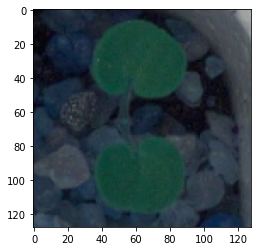

In [49]:
plt.imshow(X_testNew[33], cmap='gray')
y_pred = model.predict(X_testNew[33].reshape(1,128,128,3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 0
Softmax Outputs: [[6.42093122e-01 1.19377773e-06 1.46461986e-07 1.27197545e-05
  2.04518183e-05 9.41173494e-06 3.57824147e-01 5.81143070e-07
  2.08118236e-05 5.06793754e-08 4.32028901e-06 1.30420758e-05]]
0.99999994


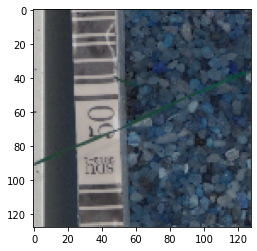

In [50]:
plt.imshow(X_testNew[36], cmap='gray')
y_pred = model.predict(X_testNew[36].reshape(1,128,128,3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 1
Softmax Outputs: [[3.4586427e-07 9.9168700e-01 7.3548965e-03 1.9721746e-08 1.2266474e-05
  5.3438375e-04 2.6437666e-08 2.4189183e-04 7.5650369e-06 9.6868956e-05
  1.0803318e-06 6.3605628e-05]]
0.99999994


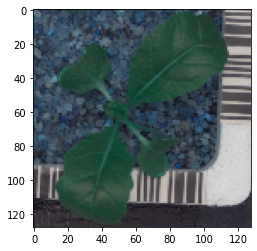

In [51]:
plt.imshow(X_testNew[59], cmap='gray')
y_pred = model.predict(X_testNew[59].reshape(1,128,128,3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())